In [1]:
%matplotlib widget

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
fig_size = (20, 10)
annotation_font_size = 11
def display(df, c_filter, title, normalize=False):
        columns = [c for c in df.columns if c_filter in c]
        gd = df.groupby('epoch').mean()
        if normalize:
            gd = (gd-gd.min())/(gd.max()-gd.min())

        ax = gd[columns].plot(figsize=fig_size, title=title)
        for c in columns:
            last_epoch = gd.index[-1]
            last_value = gd.at[last_epoch, c]
            if last_value:
                ax.annotate(f'{last_value:.2f}', xy=(last_epoch, last_value), textcoords='data', fontsize=annotation_font_size)

            x, y = gd[c].idxmin(), gd[c].min()
            ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

            x, y = gd[c].idxmax(), gd[c].max()
            ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

In [61]:
!scp -r osnielteixeira@200.20.15.153:~/experiments/. ~/Documents/UFF/mestrado/2o\ Sem/EO/gnn-co/experiments/

epoch=191-step=1535999.ckpt                   100%   84KB   2.0MB/s   00:00    
hparams.yaml                                  100%  108     6.9KB/s   00:00    
metrics.csv                                   100% 1905KB  14.8MB/s   00:00    
epoch=117-step=943999.ckpt                    100%   85KB   3.4MB/s   00:00    
hparams.yaml                                  100%  108     6.2KB/s   00:00    
metrics.csv                                   100% 1072KB  16.0MB/s   00:00    


In [62]:
# dataset = './experiments/2024-05-14 2025/0/metrics.csv'
# dataset = './experiments/2024-05-28 1948/0/metrics.csv'
# dataset = './experiments/2024-05-28 2240/0/metrics.csv'
# dataset = './experiments/2024-05-29 1249/0/metrics.csv'
metrics_path = './experiments/2024-05-30 1732/1/metrics.csv'

metrics = pd.read_csv(metrics_path)

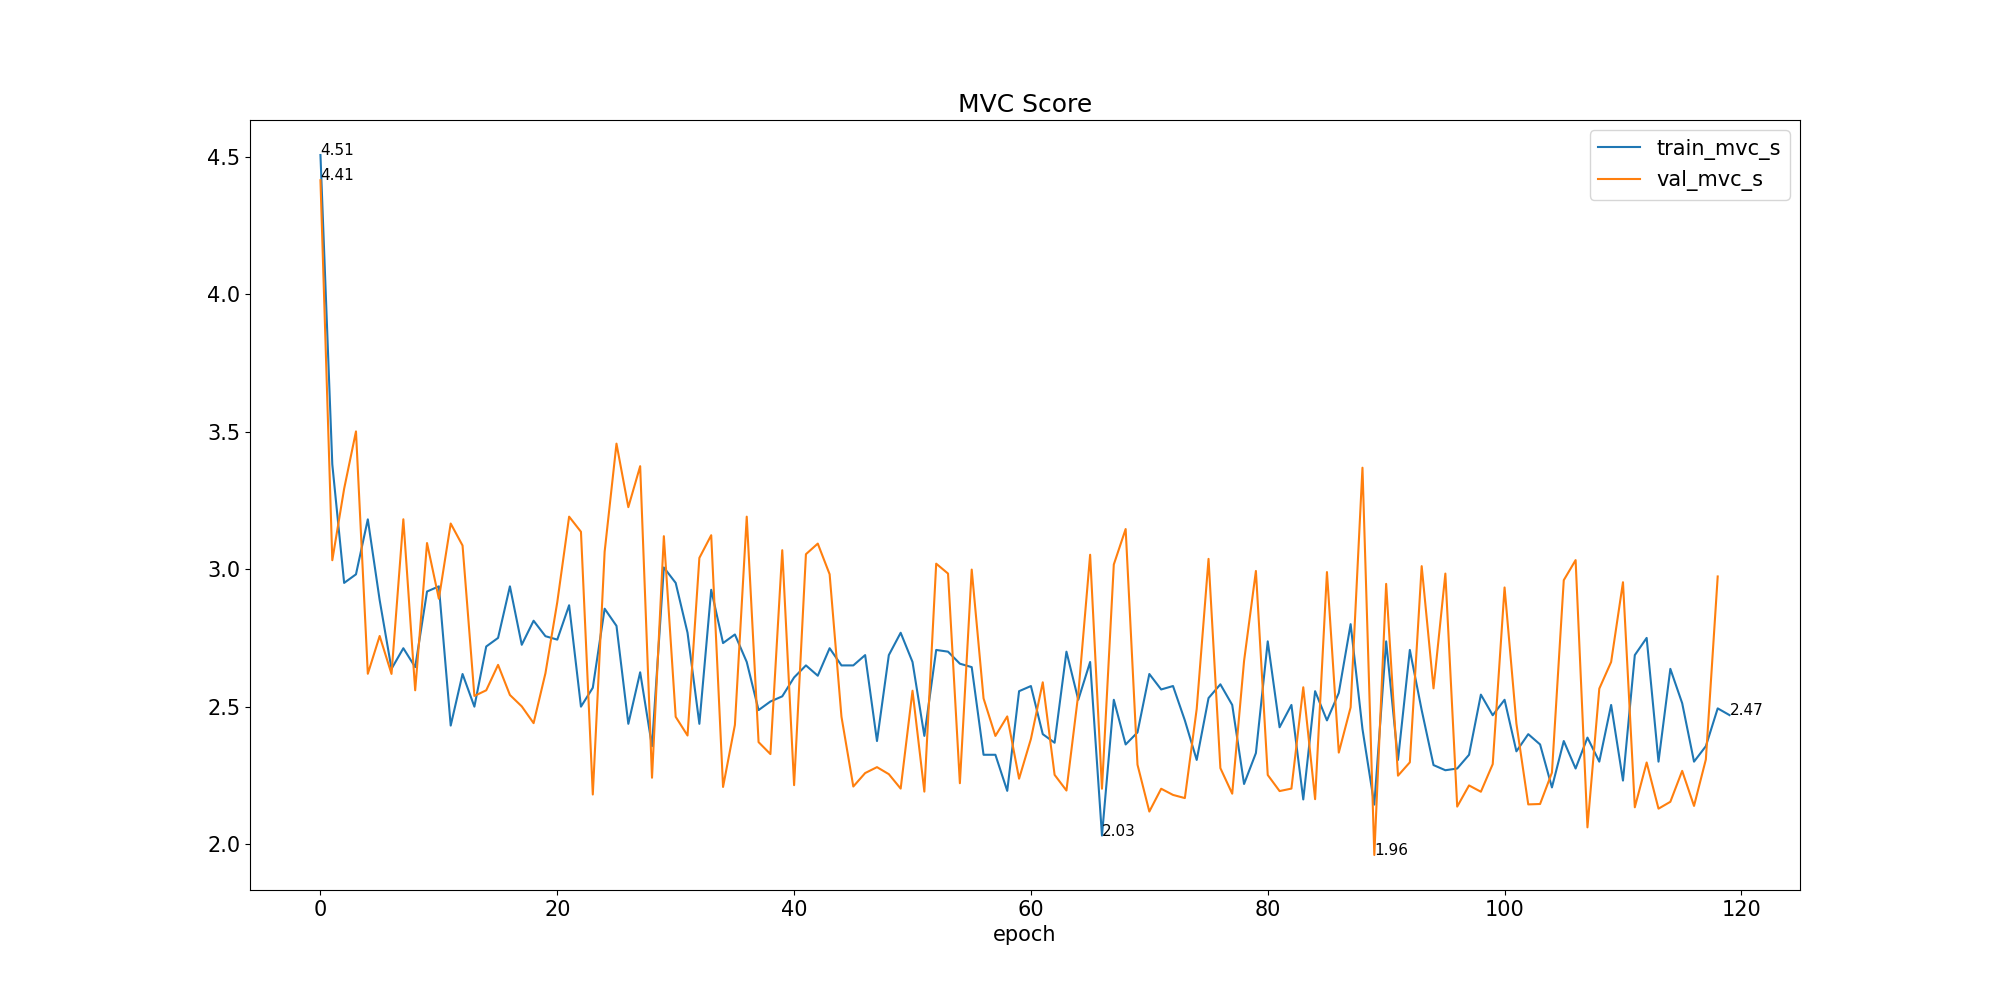

In [63]:
display(metrics, 'mvc', 'MVC Score')

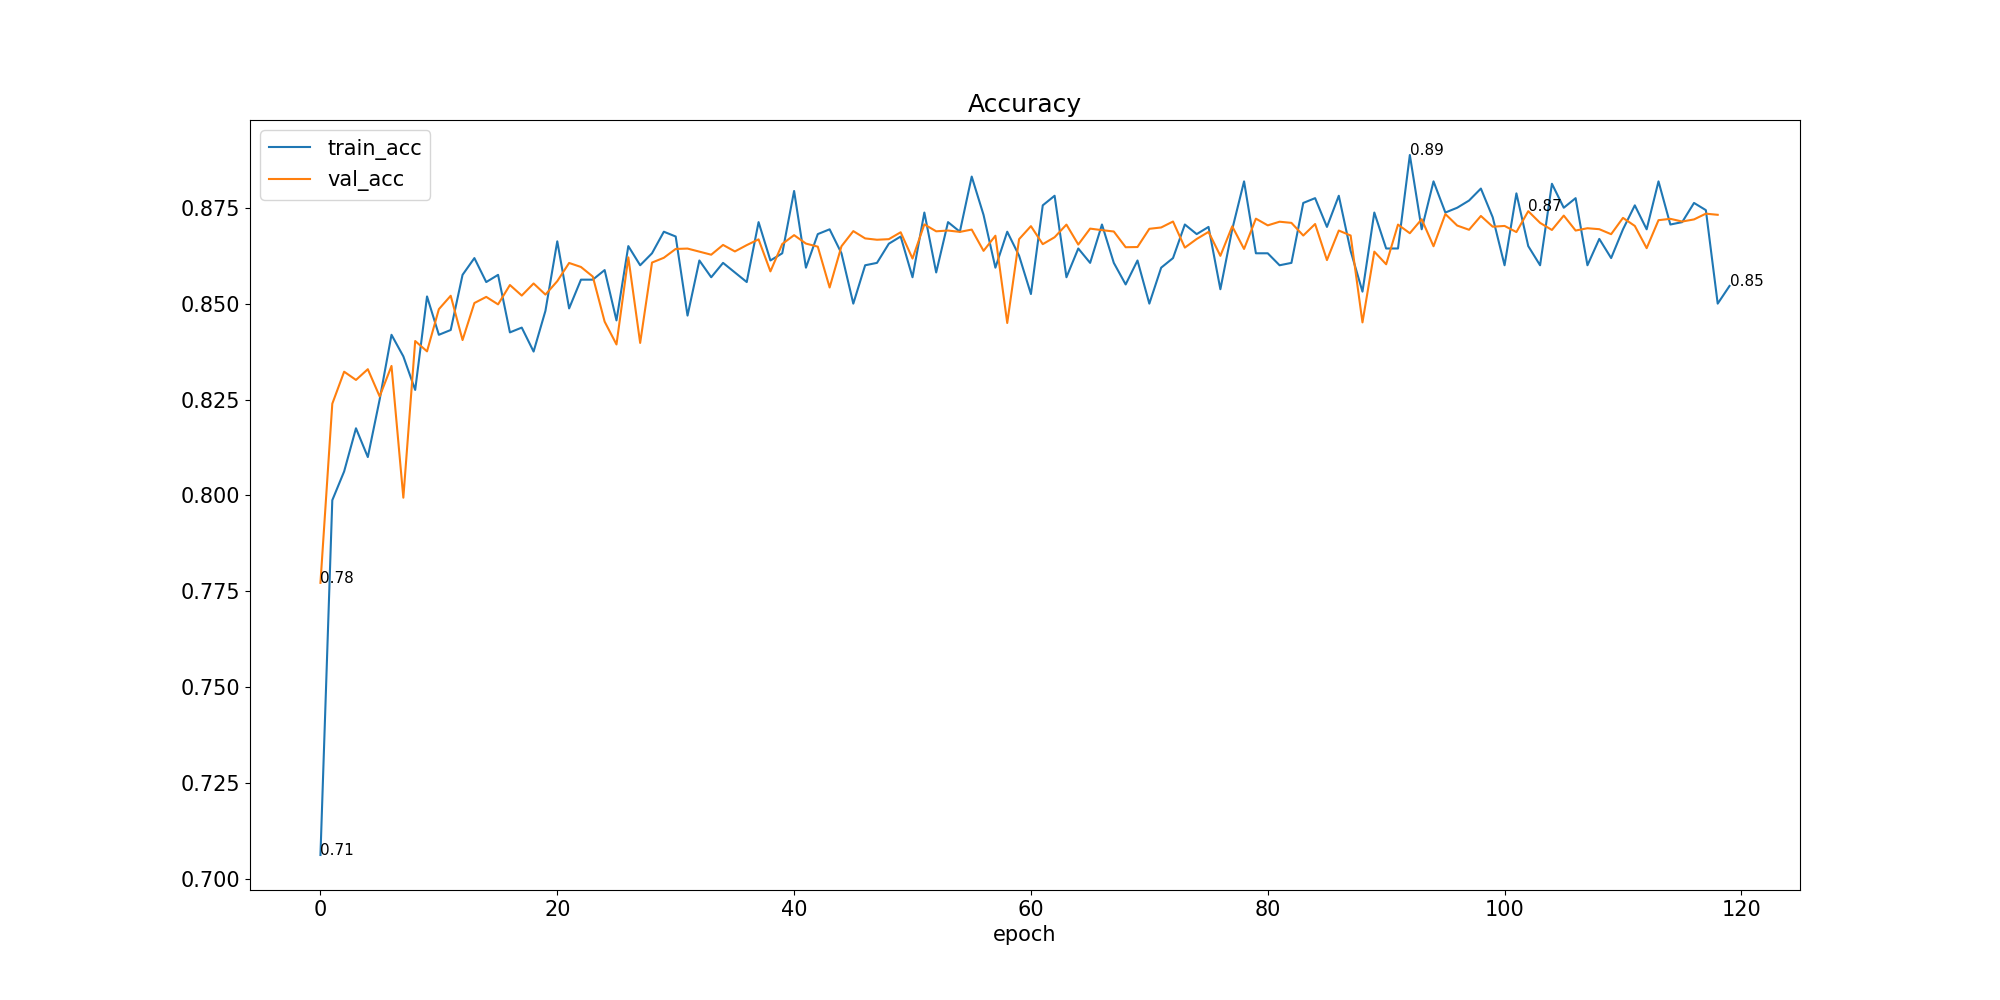

In [64]:
display(metrics, 'acc', 'Accuracy')

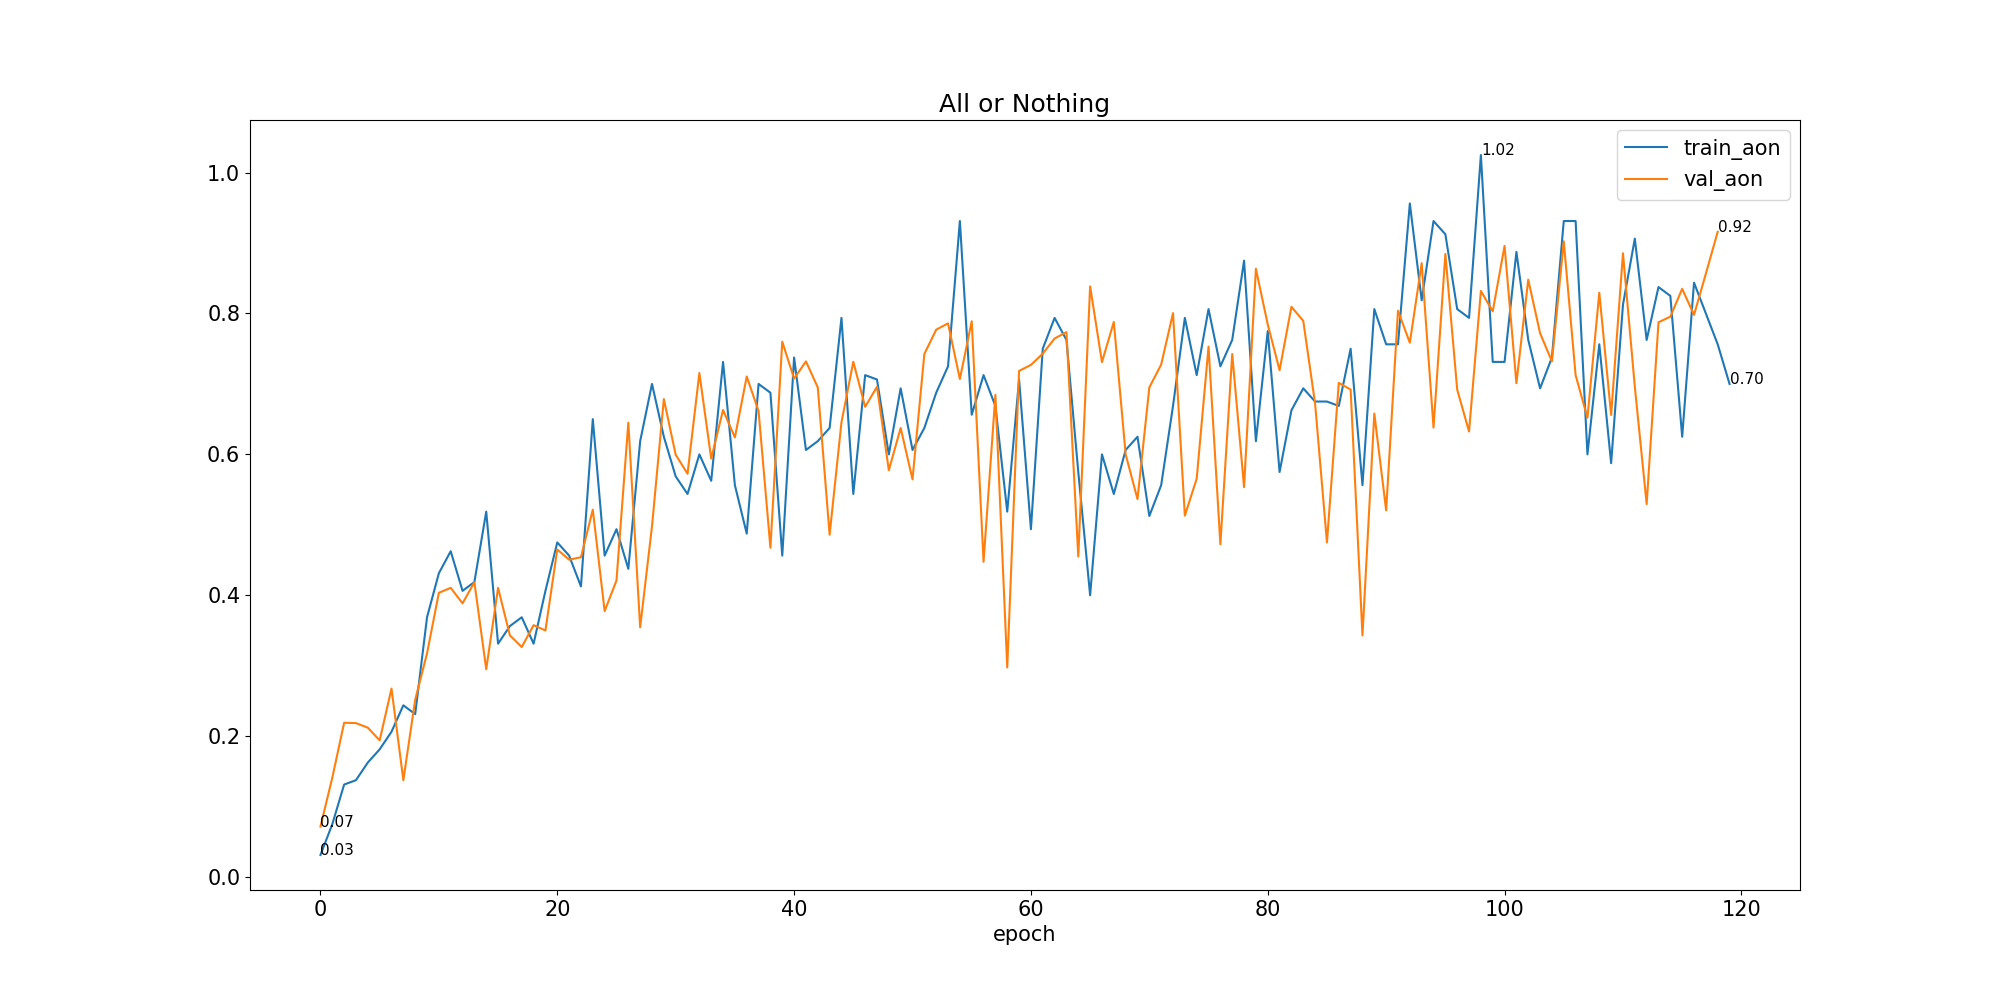

In [65]:
display(metrics, 'aon', 'All or Nothing')

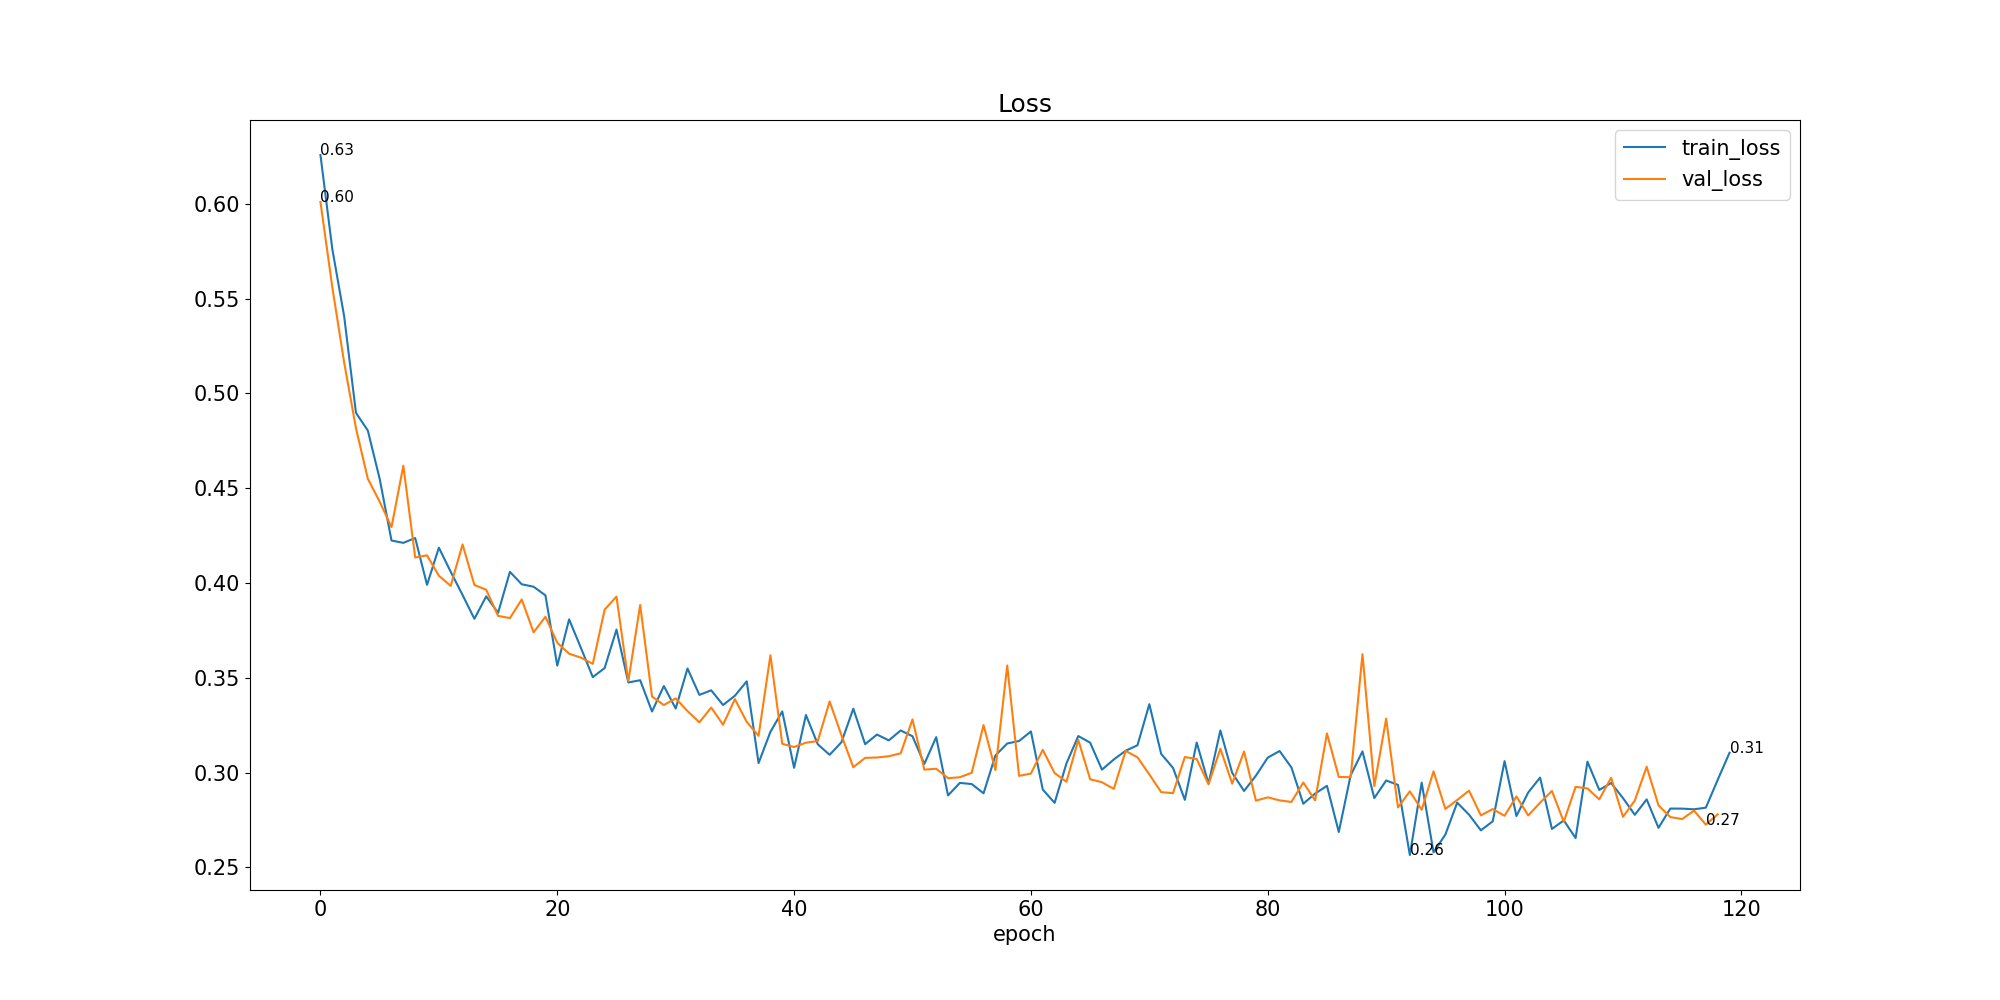

In [66]:
display(metrics, 'loss', 'Loss')

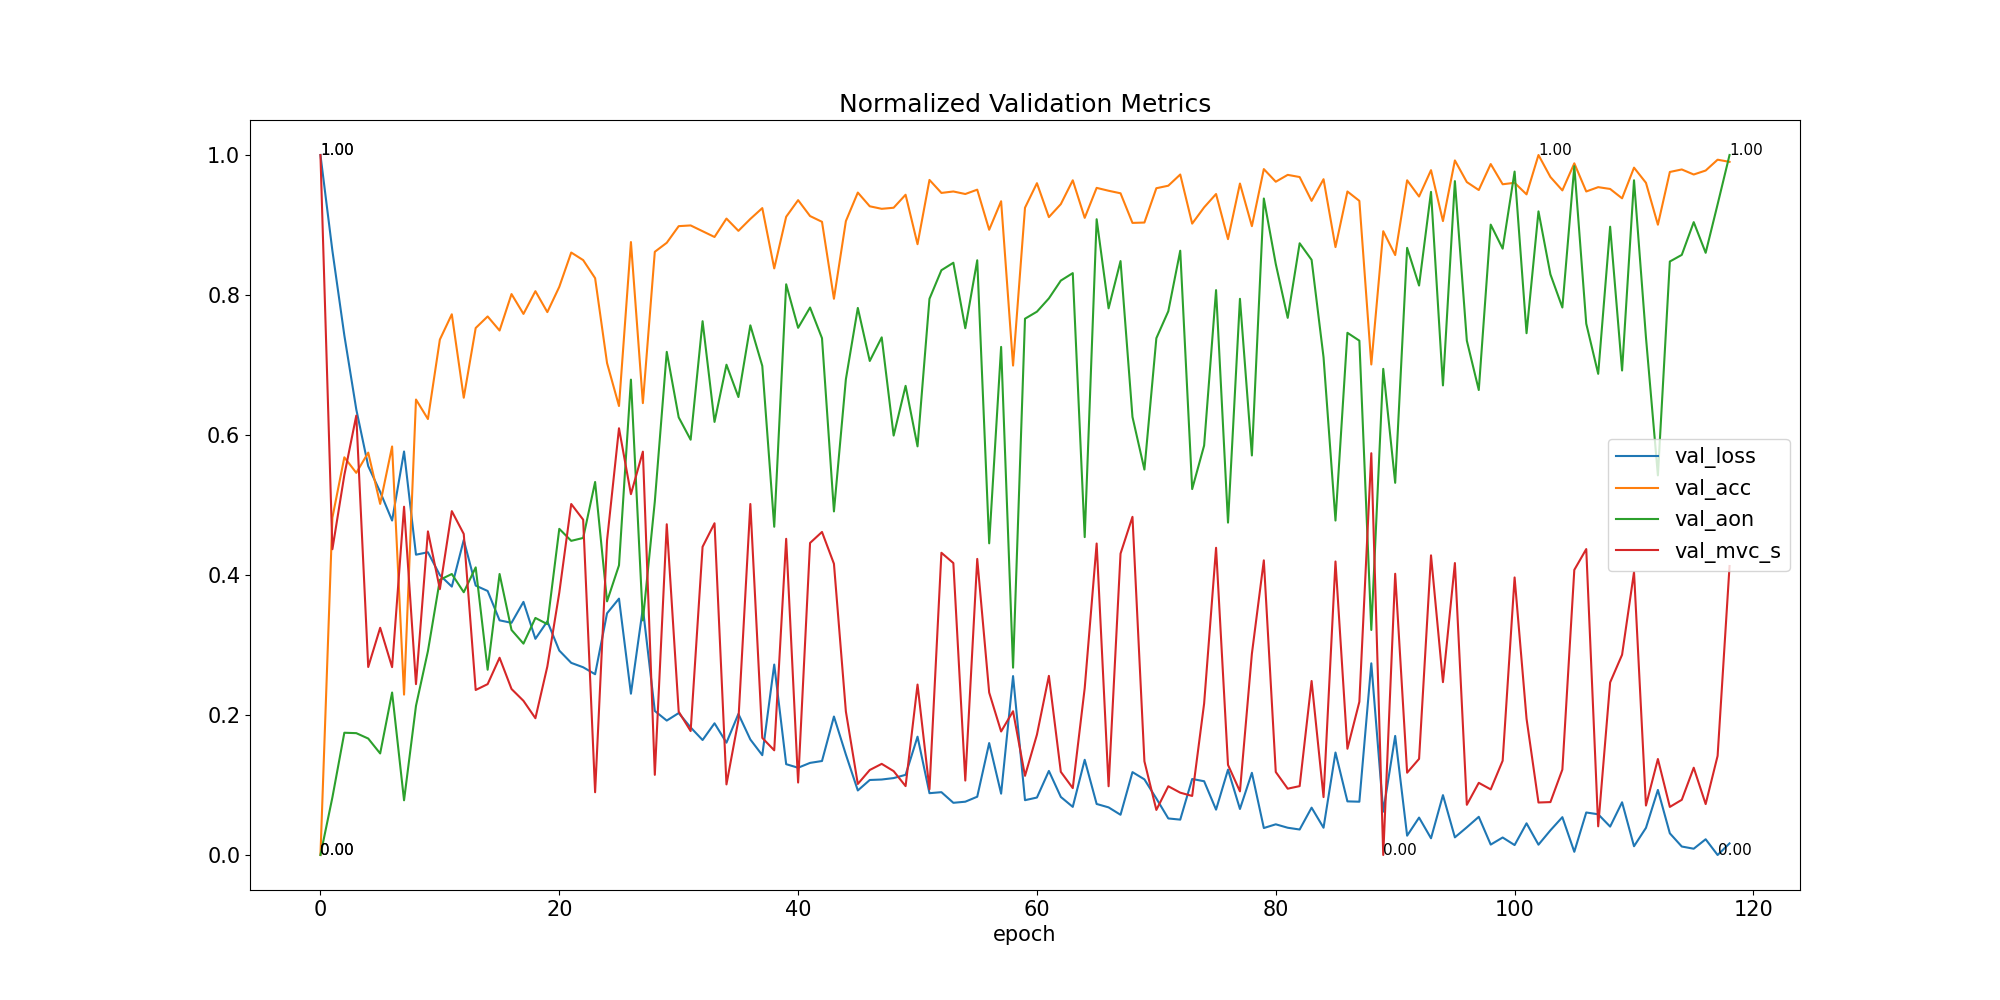

In [67]:
display(metrics, 'val', 'Normalized Validation Metrics', normalize=True)

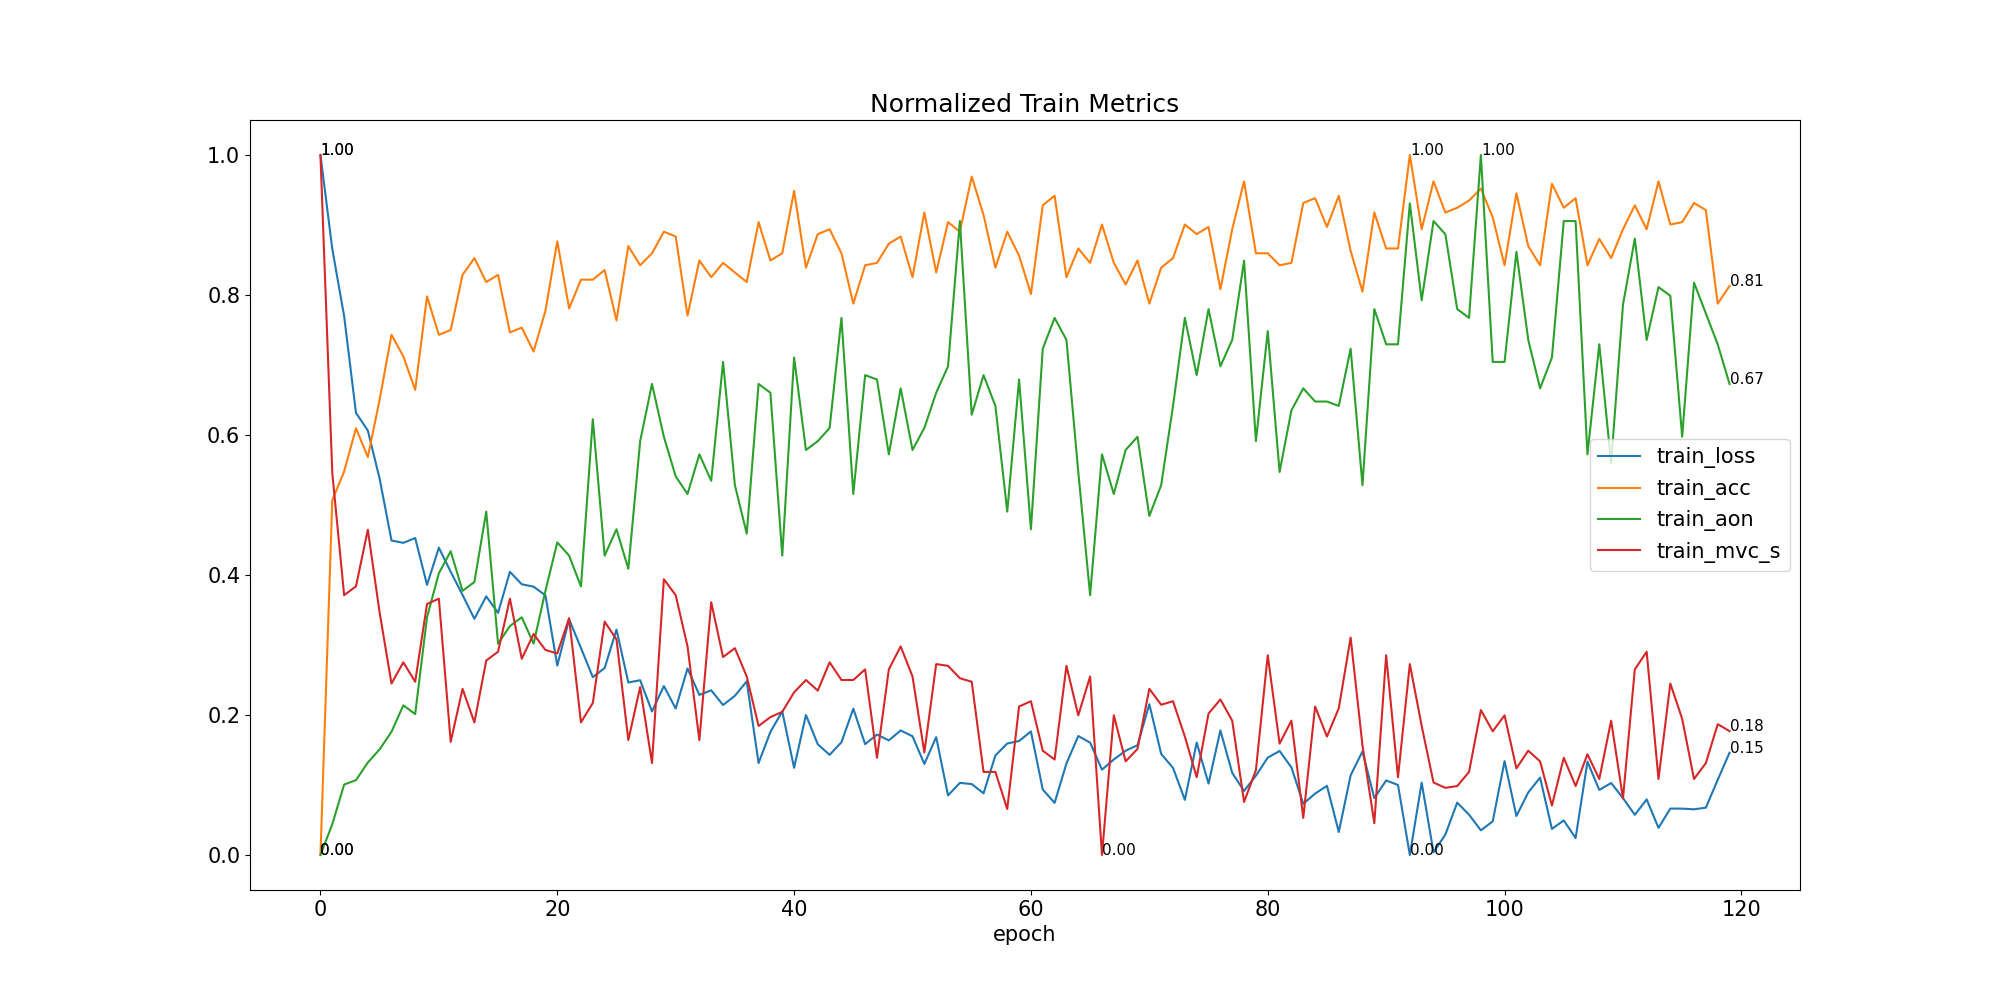

In [68]:
display(metrics, 'train', 'Normalized Train Metrics', normalize=True)